# Spectral clustering experiments

Importimg spectral clustering

In [3]:
from sklearn.cluster import SpectralClustering

In [4]:
import numpy as np

X = np.array([[1, 1], [2, 1], [1, 0],
               [4, 7], [3, 5], [3, 6]])
clustering = SpectralClustering(n_clusters=2,
         assign_labels="discretize",
         random_state=0).fit(X)
clustering.labels_



array([1, 1, 1, 0, 0, 0])

## Downloading datasets

## Segment

In [18]:
import os
os.chdir('Data_project_nla/')

In [19]:
ls

segment.dat  segment.doc


In [142]:
import pandas as pd
seg=pd.read_csv('https://pkgstore.datahub.io/machine-learning/segment/segment_csv/data/6483dd25ec712f9036982b3def16f3df/segment_csv.csv')

seg.head()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055,path
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325,foliage
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992,sky
3,32,173,9,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886,path
4,61,197,9,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227,path


In [143]:
seg.shape

(2310, 20)

### Label encoding of segemnts



In [145]:
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()

seg['class']=le.fit_transform(seg['class'])
seg.head()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055,4
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325,2
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992,5
3,32,173,9,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886,4
4,61,197,9,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227,4


In [160]:
seg.to_csv('segments.csv')

In [211]:
#Make clustering
X_seg=seg.drop('class',axis=1)
y_seg=seg['class']

In [149]:
n_classes=7
from timeit import default_timer as timer
start=timer()
clustering_seg = SpectralClustering(n_clusters=n_classes,assign_labels='kmeans',
         random_state=0).fit(X_seg)
end=timer()
time_isolet5=end-start
print(time_isolet5)
clustering_seg.labels_

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


867.1956312129987


/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [213]:
accur_segments=[]
SSE_segments=[]
time_segments=[]

for n_component in [3,7,10]:
    start=timer()
    clustering_seg = SpectralClustering(n_clusters=n_classes,assign_labels='kmeans',n_components=n_component,
         random_state=0).fit(X_seg)
    end=timer()
    time_segments.append(end-start)
    accur_segments.append(accuracy(clustering_seg.labels_,y_true=y_seg))
    SSE_segments.append(SSE(clusters_labels=clustering_seg.labels_,y_true=y_seg))
print(accur_segments)
print(SSE_segments)
print(time_segments)         
    

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encoun

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encoun

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


[0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
[30030.0, 30030.0, 30030.0]
[1049.442566496, 848.9526638379903, 701.7175882879965]


/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python

Time segments: 867.1956312129987
Accuracy: 0.14285714285714285
SSE=30030.0

In [214]:
print(accur_segments)
print(SSE_segments)
print(time_segments)  

[0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
[30030.0, 30030.0, 30030.0]
[1049.442566496, 848.9526638379903, 701.7175882879965]


In [193]:
n_init_seg=[5,6,7,8,9]
n_classes=7
accur_segments=[]
SSE_segments=[]
time_segments=[]
for n_init in n_init_seg:
    start=timer()
    clustering_seg_i = SpectralClustering(n_clusters=n_classes,assign_labels='kmeans',n_init=n_init,
         random_state=0).fit(X_seg)
    end=timer()
    time_segments.append(end-start)
    accur_segments.append(accuracy(clustering_seg_i.labels_,y_true=y_seg))
    SSE_segments.append(SSE(clusters_labels=clustering_seg_i.labels_,y_true=y_seg))
print(accur_segments)
print(SSE_segments)
print(time_segments)     

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encoun

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encoun

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encoun

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encoun

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


[0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
[30030.0, 30030.0, 30030.0, 30030.0, 30030.0]
[874.7275302920025, 914.8993595110005, 828.7092997340005, 903.5765143860044, 815.7563624039976]


/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python

In [196]:
print(accur_segments)
print(SSE_segments)
print(time_segments)

[0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
[30030.0, 30030.0, 30030.0, 30030.0, 30030.0]
[874.7275302920025, 914.8993595110005, 828.7092997340005, 903.5765143860044, 815.7563624039976]


In [198]:
n_init_seg=[5,6,7,8,9]
n_classes=7
c_accur_segments=[]
c_SSE_segments=[]
c_time_segments=[]
for n_init in n_init_seg:
    start=timer()
    clustering_seg_i = SpectralClustering(n_clusters=n_classes,assign_labels='kmeans',n_components=n_init,
         random_state=0).fit(X_seg)
    end=timer()
    print(accuracy(clustering_seg_i.labels_,y_true=y_seg))
    c_time_segments.append(end-start)
    c_accur_segments.append(accuracy(clustering_seg_i.labels_,y_true=y_seg))
    c_SSE_segments.append(SSE(clusters_labels=clustering_seg_i.labels_,y_true=y_seg))
print(c_accur_segments)
print(c_SSE_segments)
print(c_time_segments)  

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encoun

0.14285714285714285


/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: Runtim

0.14285714285714285


/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encoun

0.14285714285714285


/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encoun

0.14285714285714285


/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


0.14285714285714285
[0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
[30030.0, 30030.0, 30030.0, 30030.0, 30030.0]
[925.9602546219976, 892.0961443970009, 885.3100447680044, 866.3261332859984, 710.4723436749991]


/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python

In [152]:
from sklearn.metrics import accuracy_score
def accuracy(clusters_labels,y_true):
    clusters=np.unique(clusters_labels)
    y_pred=np.empty(len(y_true))
    
    for cluster in clusters:
        #1 find the average value in the class and predict value sing average value
        mask_cluster=clusters_labels==cluster
        mean_pred=np.bincount(y_true[mask_cluster]).argmax()
        y_pred[mask_cluster]=mean_pred
    accur=accuracy_score(y_true, y_pred)
    return accur
accuracy(clustering_seg.labels_,y_true=y_seg)

0.14285714285714285

In [155]:
clustering_seg.labels_

In [157]:
def SSE(clusters_labels,y_true):
    clusters=np.unique(clusters_labels)
    y_pred=np.empty(len(y_true))
    
    for cluster in clusters:
        #1 find the average value in the class and predict value sing average value
        mask_cluster=clusters_labels==cluster
        centre_cluster=np.bincount(y_true[mask_cluster]).argmax()
        y_pred[mask_cluster]=centre_cluster
    sse=np.sum((y_true-y_pred)**2)
    return sse

SSE(clusters_labels=clustering_seg.labels_,y_true=y_seg)

30030.0

In [ ]:
#evaluate thre balanceness of classes


## Mnist 10

In [167]:
mnist=pd.read_csv('https://pkgstore.datahub.io/machine-learning/mnist_784/mnist_784_csv/data/89c44af4c515d5a3c132bc3cc298a6bd/mnist_784_csv.csv')
X_mnist=mnist.drop('class',axis=1)
y_mnist=mnist['class']
    

In [170]:
#cut
X_mnist=X_mnist[:6000]
y_mnist=y_mnist[:6000]

In [163]:
print(28*28)

784


In [171]:
start=timer()
n_classes=10
clustering_mnist = SpectralClustering(n_clusters=n_classes,assign_labels='kmeans',
         random_state=0).fit(X_mnist)
end=timer()
clustering.labels_
print('Accuracy',accuracy(clustering_mnist.labels_,y_true=y_mnist))
print("SSE",SSE(clustering_mnist.labels_,y_true=y_mnist))
print("Time",end-start)
clustering_mnist_time=end-start

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Accuracy 0.11583333333333333
SSE 122879.0
Time 8.519621158004156


In [194]:
n_init_mnist=[8,9,10,11,12]
n_classes=10
accur_mnist=[]
SSE_mnist=[]
time_mnist=[]
for n_init in n_init_mnist:
    start=timer()
    clustering_mnist_i= SpectralClustering(n_clusters=n_classes,assign_labels='kmeans',n_init=n_init,
         random_state=0).fit(X_mnist)
    end=timer()
    time_mnist.append(end-start)
    accur_mnist.append(accuracy(clustering_mnist_i.labels_,y_true=y_mnist))
    SSE_mnist.append(SSE(clusters_labels=clustering_mnist_i.labels_,y_true=y_mnist))
print(accur_mnist)
print(SSE_mnist)
print(time_mnist)    

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: Use

[0.11583333333333333, 0.11583333333333333, 0.11583333333333333, 0.11583333333333333, 0.11583333333333333]
[122879.0, 122879.0, 122879.0, 122879.0, 122879.0]
[5.8083896879979875, 5.357408917006978, 5.232430134994502, 5.591793027000676, 5.2014431429997785]


Mnist:
      
      Accuracy 0.11583333333333333
      SSE 122879.0
      Time 8.519621158004156

## glass

In [202]:
glass=pd.read_csv('glass.csv',sep=',',decimal='.')
glass.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [203]:
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()

glass['Type']=le.fit_transform(glass['Type'])
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,0
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,2
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,0
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,5
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,1


In [204]:
X_glass=glass.drop('Type',axis=1)
y_glass=glass['Type']


In [205]:
start=timer()
n_classes=6
clustering_glass = SpectralClustering(n_clusters=n_classes,assign_labels='kmeans',
         random_state=0).fit(X_glass)
end=timer()
clustering_glass.labels_
print('Accuracy',accuracy(clustering_glass.labels_,y_true=y_glass))
print("SSE",SSE(clustering_glass.labels_,y_true=y_glass))
print("Time",end-start)
clustering_glass_time=end-start

Accuracy 0.40186915887850466
SSE 809.0
Time 0.07842933099891525


In [209]:
n_init_seg=[4,5,6,7,8]
n_classes=6
c_accur_glass=[]
c_SSE_glass=[]
c_time_glass=[]
for n_init in n_init_seg:
    start=timer()
    clustering_glass = SpectralClustering(n_clusters=n_classes,assign_labels='kmeans',n_components=n_init,
         random_state=0).fit(X_glass)
    end=timer()
    print(accuracy(clustering_glass.labels_,y_true=y_glass))
    c_time_glass.append(end-start)
    c_accur_glass.append(accuracy(clustering_glass.labels_,y_true=y_glass))
    c_SSE_glass.append(SSE(clusters_labels=clustering_glass.labels_,y_true=y_glass))
print('Accuracy',c_accur_glass)
print('SSE',c_SSE_glass)
print('Time',c_time_glass) 

0.4953271028037383
0.5046728971962616
0.40186915887850466
0.411214953271028
0.411214953271028
Accuracy [0.4953271028037383, 0.5046728971962616, 0.40186915887850466, 0.411214953271028, 0.411214953271028]
SSE [427.0, 409.0, 809.0, 769.0, 769.0]
Time [0.06061468200641684, 0.04011321299185511, 0.0357010339939734, 0.03856350400019437, 0.03851964000205044]


In [217]:
c_accur_glass=[]
c_SSE_glass=[]
c_time_glass=[]
for n_init in [3,6,9]:
    start=timer()
    clustering_glass = SpectralClustering(n_clusters=n_classes,assign_labels='kmeans',n_components=n_init,
         random_state=0).fit(X_glass)
    end=timer()
    print(accuracy(clustering_glass.labels_,y_true=y_glass))
    c_time_glass.append(end-start)
    c_accur_glass.append(accuracy(clustering_glass.labels_,y_true=y_glass))
    c_SSE_glass.append(SSE(clusters_labels=clustering_glass.labels_,y_true=y_glass))
print('Accuracy',c_accur_glass)
print('SSE',c_SSE_glass)
print('Time',c_time_glass) 

0.5794392523364486
0.5887850467289719
0.6074766355140186
Accuracy [0.5794392523364486, 0.5887850467289719, 0.6074766355140186]
SSE [263.0, 255.0, 287.0]
Time [0.12642615899676457, 0.10623160100658424, 0.12537079099274706]


Affinity matrix

In [210]:
clustering_glass.affinity_matrix_

array([[1.        , 0.58725141, 0.58795786, ..., 0.12268892, 0.43158056,
        0.01067981],
       [0.58725141, 1.        , 0.30709374, ..., 0.0297359 , 0.3955808 ,
        0.00137775],
       [0.58795786, 0.30709374, 1.        , ..., 0.40778988, 0.33347043,
        0.02619726],
       ...,
       [0.12268892, 0.0297359 , 0.40778988, ..., 1.        , 0.06070067,
        0.01706193],
       [0.43158056, 0.3955808 , 0.33347043, ..., 0.06070067, 1.        ,
        0.01968492],
       [0.01067981, 0.00137775, 0.02619726, ..., 0.01706193, 0.01968492,
        1.        ]])

## Isolet5

In [75]:
isolet5=pd.read_csv('isolet5.data',header=None,decimal='.',na_values=None)

In [76]:
isolet5.head()
isolet5=isolet5.rename({617:'target'},axis=1)
isolet5

,0,1,2,3,4,5,6,7,8,9,...,608,609,610,611,612,613,614,615,616,target
0,-0.2080,0.3480,0.3280,0.5040,0.9320,1.0000,0.8360,0.6680,0.2720,0.2400,...,0.2500,-0.0624,0.2188,0.4532,0.1094,0.1718,0.1562,0.0468,-0.3750,1.0
1,-0.2864,0.1992,0.2822,0.4398,0.7012,0.7800,1.0000,0.9792,0.5850,0.4066,...,-0.0078,-0.1472,-0.1782,0.0078,0.1162,-0.0542,-0.0542,-0.0388,-0.7984,1.0
2,-0.2348,0.3826,0.6142,0.7492,0.0546,-0.4020,-0.3504,-0.2990,-0.6848,-0.6528,...,0.2834,0.1500,0.0834,-0.2000,-0.1834,0.0500,-0.0166,-0.1834,-0.8666,2.0
3,-0.1856,0.3592,0.7126,0.7366,0.3414,0.1018,-0.1556,-0.2514,-0.2514,-0.3892,...,0.2840,0.5556,0.4568,0.4568,0.4568,0.2098,0.0370,-0.0618,-0.3334,2.0
4,-0.1814,0.4404,0.8394,1.0000,0.7564,0.1866,0.0260,-0.0726,-0.2124,-0.3730,...,0.1688,-0.1688,0.2728,0.2988,0.2468,0.1948,-0.0130,-0.2988,-0.7662,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,-0.6842,-0.3280,-0.1984,0.2956,0.8786,0.8948,0.3118,0.1822,0.1012,0.1740,...,0.7738,0.7738,0.7142,0.6428,0.5952,0.5714,0.3928,0.4286,0.2858,24.0
1555,-0.5912,-0.2420,0.8174,1.0000,0.4642,0.6428,0.6944,0.3056,-0.3888,-0.6826,...,0.1924,-0.1154,0.0192,0.2116,-0.0384,0.0192,-0.2308,-0.4230,-0.7116,25.0
1556,-0.6696,-0.3730,0.1584,0.8910,1.0000,0.9762,0.9762,0.7684,0.4106,0.0154,...,0.0910,0.1818,0.2000,0.1454,0.0182,-0.2910,0.0728,0.0728,-0.5818,25.0
1557,-0.5764,-0.1764,0.5106,0.3742,-0.1670,-0.5858,-0.7882,-0.7224,-0.6330,-0.8212,...,0.4130,0.5870,0.4348,0.5652,0.3478,-0.0434,0.3044,-0.0434,-0.5000,26.0


In [107]:
X_isolet5=isolet5.drop('target',axis=1)
y_isolet5=isolet5['target']

n_classes=26



In [133]:
from timeit import default_timer as timer
start=timer()
clustering = SpectralClustering(n_clusters=26,eigen_solver='arpack',n_components=26,assign_labels='kmeans',
         random_state=0,n_init=26).fit(X_isolet5)
end=timer()
time_isolet5=end-start
print(time_isolet5)
clustering.labels_

494.5879345030007


/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:301: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (26). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [215]:
n_init_isolet=[24,25,26,27,28]
n_classes=26
accur_isolet=[]
SSE_isolet=[]
time_isolet=[]
for n_init in [13,26,30]:
    start=timer()
    clustering_iso_i= SpectralClustering(n_clusters=n_init,assign_labels='kmeans',n_init=n_init,
         random_state=0).fit(X_isolet5)
    end=timer()
    time_isolet.append(end-start)
    accur_isolet.append(accuracy(clustering_iso_i.labels_,y_true=y_isolet5))
    SSE_isolet.append(SSE(clusters_labels=clustering_iso_i.labels_,y_true=y_isolet5))
print(accur_isolet)
print(SSE_isolet)
print(time_isolet)

/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:301: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:301: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (26). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


[0.046183450930083386, 0.04810776138550353, 0.046183450930083386]
[325548.0, 324096.0, 325548.0]
[269.78557276799984, 520.2175419970008, 598.1489281990071]


/Users/fingon/.pyenv/versions/3.7.8/envs/my-l-environ-3.7.8/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:301: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


Clustering for isolet5:

    Time: 494.5879345030007
    Accuracy: 0.04810776138550353
    SSE: 324096.0

In [134]:
np.unique(clustering.labels_,return_counts=True)

(array([0, 1, 2, 4, 5, 8], dtype=int32),
 array([1544,    1,    1,   11,    1,    1]))

In [135]:
y_isolet5[clustering.labels_==1]

1552    23.0
Name: target, dtype: float64

In [136]:
np.bincount(clustering.labels_).argmax()

0

In [137]:
from sklearn.metrics import accuracy_score
def accuracy(clusters_labels,y_true):
    clusters=np.unique(clusters_labels)
    y_pred=np.empty(len(y_true))
    
    for cluster in clusters:
        #1 find the average value in the class and predict value sing average value
        mask_cluster=clusters_labels==cluster
        mean_pred=np.bincount(y_true[mask_cluster]).argmax()
        y_pred[mask_cluster]=mean_pred
    accur=accuracy_score(y_true, y_pred)
    return accur


In [138]:
accuracy(clustering.labels_,y_true=y_isolet5)

0.04810776138550353

In [158]:
SSE(clusters_labels=clustering.labels_,y_true=y_isolet5)

324096.0

## Blobs

In [182]:
from sklearn.datasets import make_blobs
X_blobs, y_blobs = make_blobs()

clustering_blobs = SpectralClustering(n_clusters=3,eigen_solver='arpack',assign_labels='kmeans',
         random_state=0).fit(X_blobs)


In [183]:
clustering_blobs.labels_

array([1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0,
       0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1], dtype=int32)

Text(0.5, 1.0, 'Spectral clusterin: Blobs Predictions')

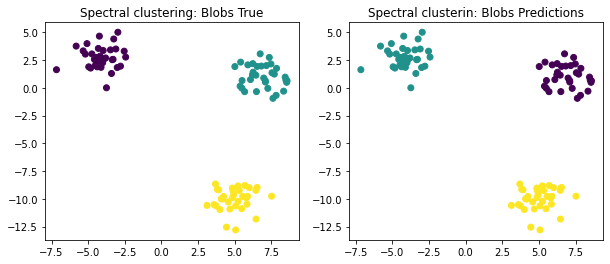

In [184]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
ax[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c = y_blobs)
ax[0].set_title('Spectral clustering: Blobs True')
ax[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c = clustering_blobs.labels_)
ax[1].set_title('Spectral clusterin: Blobs Predictions')

In [220]:
X_blobs, y_blobs = make_blobs()
time_st=timer()
clustering_blobs = SpectralClustering(n_clusters=n_cls,eigen_solver='arpack',assign_labels='kmeans',
             random_state=0).fit(X_blobs)
time_end=timer()
print(time_end-time_st)
print(accuracy(clustering_blobs.labels_,y_blobs))

0.09965215499687474
1.0


In [218]:
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering
from timeit import default_timer as timer
dict_blobs_acc=dict()
dict_blobs_sse=dict()
for n_clusters in [5,6,7,8,9,10]:
    X_blobs, y_blobs = make_blobs( centers=n_clusters)
    accur_blobs=[]
    SSE_blobs=[]
    time_blobs=[]
    for n_cls in np.arange(n_clusters-3,n_clusters+3):
      
        start=timer()
        clustering_blobs = SpectralClustering(n_clusters=n_cls,eigen_solver='arpack',assign_labels='kmeans',
             random_state=0).fit(X_blobs)
        end=timer()
        time_blobs.append(end-start)
        accur_blobs.append(accuracy(clustering_blobs.labels_,y_true=y_blobs))
        SSE_blobs.append(SSE(clusters_labels=clustering_blobs.labels_,y_true=y_blobs))
    dict_blobs_acc[n_clusters]=accur_blobs
    dict_blobs_sse[n_clusters]=SSE_blobs
    print(time_segments)  

[1049.442566496, 848.9526638379903, 701.7175882879965]
[1049.442566496, 848.9526638379903, 701.7175882879965]
[1049.442566496, 848.9526638379903, 701.7175882879965]
[1049.442566496, 848.9526638379903, 701.7175882879965]
[1049.442566496, 848.9526638379903, 701.7175882879965]
[1049.442566496, 848.9526638379903, 701.7175882879965]


([<matplotlib.axis.XTick at 0x140e805d0>,
 [Text(0, 0, '-3'),
  Text(1, 0, '-2'),
  Text(2, 0, '-1'),
  Text(3, 0, '0'),
  Text(4, 0, '1'),
  Text(5, 0, '2')])

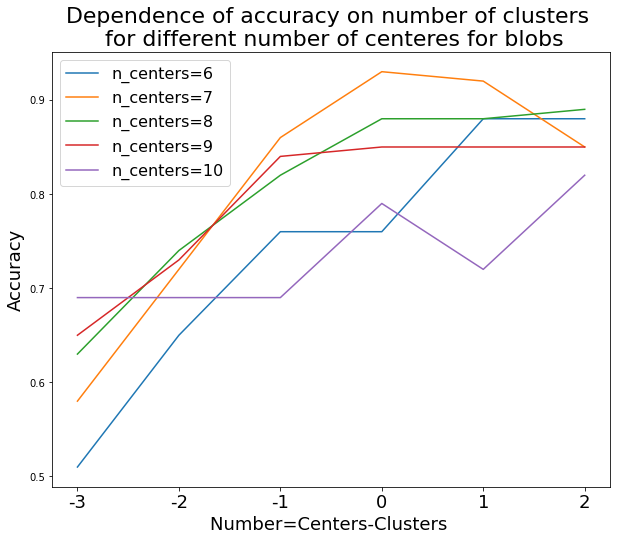

In [219]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
for n_clusters in [6,7,8,9,10]:
    plt.plot(dict_blobs_acc[n_clusters],label='n_centers={}'.format(n_clusters))
plt.legend(fontsize=16)
plt.title('Dependence of accuracy on number of clusters \n for different number of centeres for blobs',fontsize=22)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number=Centers-Clusters ',fontsize=18)

plt.xticks(np.arange(0,6),labels=[-3,-2,-1,0,1,2],fontsize=18)